<a href="https://colab.research.google.com/github/KiranJoshi25/Data-road_sign/blob/main/Road_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [54]:
img = image.load_img("/content/sample_data/Computer vision/BaseData/Training/Stop/1.jpg")

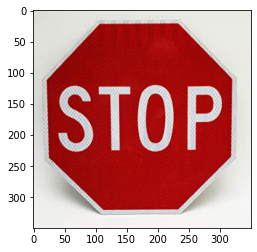

In [55]:
plt.imshow(img)

In [56]:
cv2.imread("/content/sample_data/Computer vision/BaseData/Training/Stop/1.jpg").shape

(350, 350, 3)

In [57]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)


In [58]:
train_dataset = train.flow_from_directory('/content/sample_data/Computer vision/BaseData/Training/',
                                          target_size = (300,300),
                                          batch_size = 2,
                                          class_mode ='binary')
Validation_dataset = train.flow_from_directory('/content/sample_data/Computer vision/BaseData/Validation/',
                                          target_size = (300,300),
                                          batch_size = 2,
                                          class_mode ='binary')

Found 11 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


In [59]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'No_Entry': 1, 'Stop': 2}

In [60]:
train_dataset.classes

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [61]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                    ])

In [62]:
from tensorflow.keras import optimizers
model.compile(
              loss='binary_crossentropy', 
              
              optimizer = optimizers.RMSprop(lr=0.001),
              
              metrics = ['accuracy'])

In [63]:

model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs=30,
                      validation_data = Validation_dataset)

Epoch 1/30
3/3 [==============================] - 2s 775ms/step - loss: -104.1607 - accuracy: 0.5000 - val_loss: -1135.3771 - val_accuracy: 0.3636
Epoch 2/30
3/3 [==============================] - 2s 725ms/step - loss: -2900.5911 - accuracy: 0.3333 - val_loss: -10929.4600 - val_accuracy: 0.3636
Epoch 3/30
3/3 [==============================] - 2s 735ms/step - loss: -19928.6035 - accuracy: 0.3333 - val_loss: -53253.8633 - val_accuracy: 0.3636
Epoch 4/30
3/3 [==============================] - 2s 751ms/step - loss: -101057.8750 - accuracy: 0.5000 - val_loss: -189219.3906 - val_accuracy: 0.3636
Epoch 5/30
3/3 [==============================] - 2s 746ms/step - loss: -223603.8281 - accuracy: 0.5000 - val_loss: -421978.0938 - val_accuracy: 0.3636
Epoch 6/30
3/3 [==============================] - 2s 734ms/step - loss: -373585.2500 - accuracy: 0.3333 - val_loss: -713462.4375 - val_accuracy: 0.3636
Epoch 7/30
3/3 [==============================] - 2s 739ms/step - loss: -798816.1875 - accuracy: 0

In [64]:
dir_path = '/content/sample_data/Computer vision/BaseData/Testing'

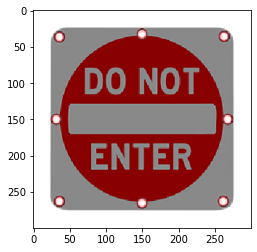

No_Entry


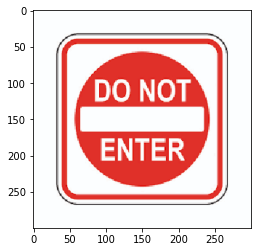

No_Entry


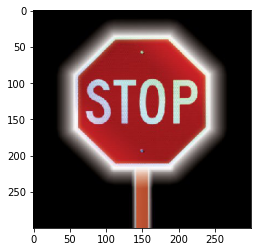

No_Entry


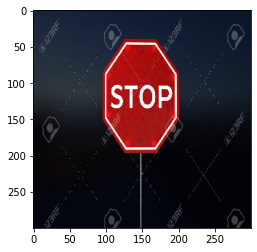

No_Entry


IsADirectoryError: ignored

In [69]:
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(300,300))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 1:
    print("No_Entry")
  else:
    print("Stop")
  